MVP Experiment for soccer player, teams, leagues

Goal: Determine the best approach for conducting the MVP based on statistics

Summmary: Using two features (SPI ratings and games played) will not only include additional feature engineering - but also an inside look into the various skews for SPI scaling. Scaling the SPIs is necessary since the score between players are differentiated by only .01 while difference betwen games played amongst the athletes are from 1-10%. So even if I scaled both, the number of games played would still have a higher impact on the MVP outcome compared to the SPI. Therefore the SPI scores needs to be scaled. 


Introduction: The assumption here is that both features are the only stats you need for conducting an MVP. SPI's consist of individual features extracted from each game like goals, assists, poccession, etc. I think as long as a person plays at least 10 min, they receive a score. Otherwise, they don't. I still need to read the paper to confirm it though. Also, I believe each player starts off with a 7.0 SPI score. Also, I am using the term "Most Valuable Player" in the sense of the best performance in a league or tournament - not the actual amount they are worth. 







Soccer MVP API

⁃ The output from the two features is a Euclidean distance.
⁃ Compute the distribution of just spis? No as the mvp needs both features to be taken into account.
⁃ Is the mvp always in the third standard deviation?
⁃ Compare my results to the actual mvps who won
⁃ Compute the distribution of Euclidean distances for both features mentioned- players in lower bound 3rd standard deviation are VP winners





1. Compute Euclidean distance for all players
2. View the distribution of Euclidean distances
3. List all players in 3rd standard deviation (lower bound) and then rank them.



Features
Max spi
Max games
Team mean
League mean

Todo:





Findings:
- Use scaler of 10 for SPIs 

In [1]:
# Pyenv Environment:  soccer_app_env1

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Gather all Mock SPI scores 
# i.e. 7.00-9.99 (skip every .05) 
# Generator that produces a new score everytime it's called
mock_spis = []
def spi_generator(start_num, end_num: int):
    while start_num < end_num:
        mock_spis.append(start_num)
        start_num += 0.05
    mock_spis.append(9.99)
    return mock_spis    



In [24]:
spis = spi_generator(7, 10)


In [25]:
spis

[7,
 7.05,
 7.1,
 7.1499999999999995,
 7.199999999999999,
 7.249999999999999,
 7.299999999999999,
 7.349999999999999,
 7.399999999999999,
 7.449999999999998,
 7.499999999999998,
 7.549999999999998,
 7.599999999999998,
 7.649999999999998,
 7.6999999999999975,
 7.749999999999997,
 7.799999999999997,
 7.849999999999997,
 7.899999999999997,
 7.949999999999997,
 7.9999999999999964,
 8.049999999999997,
 8.099999999999998,
 8.149999999999999,
 8.2,
 8.25,
 8.3,
 8.350000000000001,
 8.400000000000002,
 8.450000000000003,
 8.500000000000004,
 8.550000000000004,
 8.600000000000005,
 8.650000000000006,
 8.700000000000006,
 8.750000000000007,
 8.800000000000008,
 8.850000000000009,
 8.90000000000001,
 8.95000000000001,
 9.00000000000001,
 9.050000000000011,
 9.100000000000012,
 9.150000000000013,
 9.200000000000014,
 9.250000000000014,
 9.300000000000015,
 9.350000000000016,
 9.400000000000016,
 9.450000000000017,
 9.500000000000018,
 9.550000000000018,
 9.60000000000002,
 9.65000000000002,
 9.700

In [30]:
print(f"Number of SPI scores to analyze: {len(spis)}")

Number of SPI scores to analyze: 61


In [41]:
spis_scaled = [[spi**s for spi in spis] for s in range(2,11)]

In [42]:
spis_scaled

[[49,
  49.7025,
  50.41,
  51.122499999999995,
  51.83999999999999,
  52.562499999999986,
  53.289999999999985,
  54.02249999999998,
  54.75999999999998,
  55.502499999999976,
  56.24999999999997,
  57.00249999999997,
  57.75999999999997,
  58.522499999999965,
  59.289999999999964,
  60.06249999999996,
  60.839999999999954,
  61.62249999999995,
  62.40999999999995,
  63.202499999999944,
  63.99999999999994,
  64.80249999999995,
  65.60999999999997,
  66.42249999999997,
  67.24,
  68.0625,
  68.89000000000001,
  69.72250000000003,
  70.56000000000003,
  71.40250000000005,
  72.25000000000006,
  73.10250000000008,
  73.96000000000008,
  74.8225000000001,
  75.69000000000011,
  76.56250000000013,
  77.44000000000014,
  78.32250000000015,
  79.21000000000016,
  80.10250000000018,
  81.0000000000002,
  81.9025000000002,
  82.81000000000022,
  83.72250000000024,
  84.64000000000024,
  85.56250000000027,
  86.49000000000028,
  87.4225000000003,
  88.36000000000031,
  89.30250000000032,
  90.

In [43]:
len(spis_scaled)

9

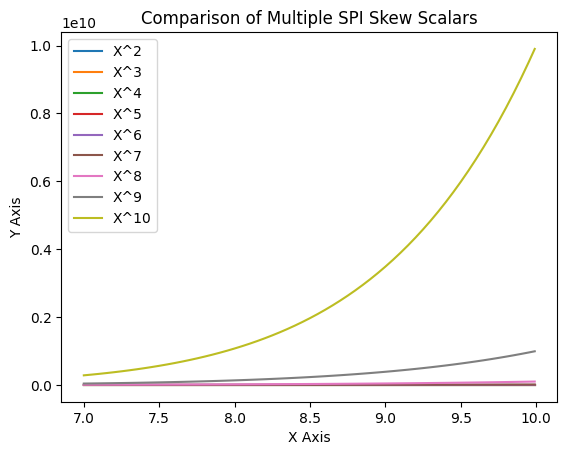

In [48]:
# Plot each y-axis list against the same x-axis list
for i, y in enumerate(spis_scaled):
    plt.plot(spis, y, label=f'X^{i+2}')  # Add a label for each line

# Adding title and labels
plt.title('Comparison of Multiple SPI Skew Scalars')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()  # Display the legend

# Show plot
plt.show()

In [46]:
y_scaled_10 = spis_scaled[-1]
y_scaled_10

[282475249,
 303313101.5032742,
 325524355.100988,
 349188890.42392653,
 374390624.2624484,
 401217683.12473345,
 429762582.97035515,
 460122415.29371905,
 492399039.73558676,
 526699283.40462863,
 563135147.0947253,
 601824018.5875686,
 642888893.2339923,
 686458602.0113964,
 732668047.2586176,
 781658446.2936383,
 833577583.1236169,
 888580068.4608756,
 946827608.2626809,
 1008489281.0169078,
 1073741823.9999952,
 1142769928.7379642,
 1215766545.9056897,
 1292933199.904115,
 1374480313.3596046,
 1460627541.7942514,
 1551604118.7205868,
 1647649211.4188597,
 1749012287.6598136,
 1855953493.6407094,
 1968744043.407235,
 2087666620.0388749,
 2213015788.88032,
 2345098423.106553,
 2484234141.9143753,
 2630755761.638305,
 2785009760.094046,
 2947356754.4579945,
 3118171992.9966507,
 3297845860.9652004,
 3486784401.0000415,
 3685409848.335564,
 3894161181.181126,
 4113494686.5998187,
 4343884542.236385,
 4585823414.247439,
 4839823071.79301,
 5106415018.454367,
 5386151140.949091,
 5679604

---

In [49]:
# Connect to Fotmob API


## Workflow

### Functions

- Extract all players spi scores and games played based on league name and year and put into dataframe - player name, SPI, SPI scaled up,- SPI - scaled down, games played, games played - scaled down 

- Save dataframe to Cloud Storage (or locally for now)

- Determine max scaled SPI and Max Games Played

- Scale Games down by the max games played i.e. games_played_by_random_player/max_games_played

- Scale down the scaled up SPI to fit between the values of 0 and 1 (i.e scaled_up_spi_by_random_player/max_scaled_up_spi)

- Compute the Euclidean Distance between both features 

- Plot on Distibution

- Determine the players that are in the third standard deviation within the lower bound (maybe add n players that are from the second deviation to showcase who was close to making the MVP List) - reorder dataframe

- Save finalized list of MVPs as its own dataframe - save in GCS or locally for now.


In [51]:

import requests




In [98]:
# FOTMOB_URL = "https://www.fotmob.com/api"
# FOTMOB_URL = "https://www.fotmob.com/leagues/130/overview/mls"
# FOTMOB_URL = "https://www.fotmob.com/leagues/130/stats/season/22602/players/rating"
FOTMOB_URL = "https://www.fotmob.com/players/30981/lionel-messi"

In [99]:
# Set headers to request JSON
headers = {
    "Accept": "application/json"
}

In [100]:
x = requests.get(FOTMOB_URL, auth=("user", "pass"), headers=headers)

In [101]:
import bs4

In [102]:
# Use Beautiful Soup to handle the HTML parsing

soup = bs4.BeautifulSoup(x.text, "html.parser")

In [104]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta content="app-id=488575683" name="apple-itunes-app"/><link href="android-app://com.mobilefootie.wc2010/http" rel="alternate"/><link href="/img/android-icon-192x192.png" rel="apple-touch-icon"/><meta content="all" name="robots"/><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/><meta content="FotMob" property="og:site_name"/><meta content="1200" property="og:image:width"/><meta content="630" property="og:image:height"/><meta content="204905456199565" property="fb:app_id"/><meta content="christer.nordvik" property="fb:admins"/><meta content="https://www.facebook.com/fotmob" property="article:author"/><meta content="https://www.facebook.com/fotmob" property="article:publisher"/><meta content="iAsqa4atH8Kb02MqS9Sc0oZC__7WrvJYU6zYqJqE6Ww" name="google-site-verification"/><link href="https://www.fotmob.com/topnews/feed" rel="alternate" title="Top news" type="application/atom+xml"/><link 

In [105]:
a_tags = soup.find_all("a")

In [109]:
a_tags

[<a aria-label="Link to Home" href="/en"><style data-emotion="css hx1sps-LogoLink">.css-hx1sps-LogoLink{min-width:150px;height:100%;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;}.css-hx1sps-LogoLink svg{width:121px;height:20px;}.css-hx1sps-LogoLink:hover,.css-hx1sps-LogoLink:focus{opacity:0.6;}</style><span class="css-hx1sps-LogoLink exu36ki4"><svg height="18" viewbox="0 0 108 18" width="108" xmlns="http://www.w3.org/2000/svg"><g fill="var(--GlobalColorScheme-Logo-color)" id="ic_fotmob_logo" transform="translate(-586 -21)"><path class="cls-1" d="M103.359 8.679c1.811-.642 3.132-1.887 3.132-3.811 0-3.585-2.906-4.679-6.453-4.679h-5.4a1 1 0 0 0-.981.981v16.6h6.943c4.264 0 6.377-2.34 6.377-5.17.004-2.072-1.203-3.355-3.618-3.921zm-6.491-5.7H100c2.226 0 2.906.868 2.906 2.3 0 2.906-3.321 2.189-6 2.3v-4.6zm3.623 11.962h-3.585v-4.6h3.585c1.66 0 2.906.566 2.906 2.226.003 1.697

In [108]:
player_data

[]